In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
import shap


In [ ]:
# Load the dataset
df = pd.read_csv("./Airlines.csv")

In [ ]:
# 1. Flight Delay Prediction (Classification)
X = df[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']]
y = df['Delay']
X = pd.get_dummies(X)  # One-hot encoding categorical variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Flight Delay Prediction Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Flight Delay Prediction Accuracy: 0.618964190698666
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     59879
           1       0.57      0.56      0.56     47998

    accuracy                           0.62    107877
   macro avg       0.61      0.61      0.61    107877
weighted avg       0.62      0.62      0.62    107877



In [ ]:
# 3. Airline Performance Analysis (Clustering Airlines by Delay Rate)
delay_rates = df.groupby('Airline')['Delay'].mean().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
delay_rates['Cluster'] = kmeans.fit_predict(delay_rates[['Delay']])
print("Airline Clustering:")
print(delay_rates.sort_values('Cluster'))

Airline Clustering:
   Airline     Delay  Cluster
0       9E  0.397660        0
1       AA  0.388470        0
2       AS  0.339290        0
6       EV  0.402208        0
11      OH  0.277276        0
10      MQ  0.348095        0
9       HA  0.320186        0
8       FL  0.301292        0
13      UA  0.323907        0
14      US  0.335971        0
17      YV  0.242914        0
16      XE  0.378944        0
15      WN  0.697759        1
5       DL  0.450476        2
7       F9  0.449040        2
3       B6  0.467038        2
12      OO  0.452899        2
4       CO  0.566199        2


In [ ]:
# 4. Most Delay-Prone Routes
delay_by_route = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].mean().reset_index()
delay_by_route = delay_by_route.sort_values(by='Delay', ascending=False).head(10)
print("Most Delay-Prone Routes:")
print(delay_by_route)

Most Delay-Prone Routes:
     AirportFrom AirportTo  Delay
4012         STL       SAN    1.0
3344         PIT       CRW    1.0
325          BGR       LGA    1.0
321          BFL       SBP    1.0
2076         LAS       BUF    1.0
287          AVP       JFK    1.0
1264         DTW       HNL    1.0
2879         MTJ       LAX    1.0
3063         ORD       MHT    1.0
1893         IDA       PIH    1.0


In [ ]:
# 5. Time-Series Forecasting for Delays
delays_per_day = df.groupby('DayOfWeek')['Delay'].sum()
start_date = "2022-06-01"  # The real start date of the dataset
date_index = pd.date_range(start=start_date, periods=7, freq='D')  # One full week
delays_per_day.index = date_index
model = ARIMA(delays_per_day, order=(2,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=7)
print("7-Day Delay Forecast:")
print(forecast)

7-Day Delay Forecast:
2022-06-08    28862.636536
2022-06-09    30600.472649
2022-06-10    29939.971670
2022-06-11    30317.404158
2022-06-12    30165.212130
2022-06-13    30247.789406
2022-06-14    30213.025076
Freq: D, Name: predicted_mean, dtype: float64


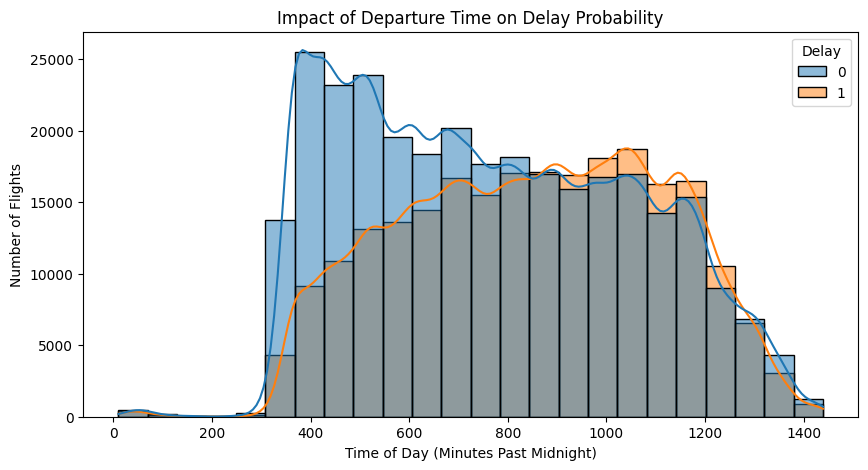

In [ ]:
# 6. Impact of Departure Time on Delay Probability
plt.figure(figsize=(10, 5))
sns.histplot(df, x='Time', hue='Delay', bins=24, kde=True)
plt.xlabel('Time of Day (Minutes Past Midnight)')
plt.ylabel('Number of Flights')
plt.title('Impact of Departure Time on Delay Probability')
plt.show()

In [ ]:
# 7. Feature Importance for Delay Prediction
explainer = shap.Explainer(clf)
shap_values = explainer(X_test[:100])
shap.summary_plot(shap_values, X_test[:100])

In [ ]:
# 8. Optimal Flight Scheduling (Finding Best Times with Lowest Delays)
best_times = df.groupby('Time')['Delay'].mean().reset_index()
best_times = best_times.sort_values(by='Delay', ascending=True).head(10)
print("Best Flight Departure Times (Least Delay):")
print(best_times)

Best Flight Departure Times (Least Delay):
      Time  Delay
1116  1414    0.0
55     341    0.0
1118  1416    0.0
1119  1419    0.0
1038  1328    0.0
1051  1343    0.0
52     337    0.0
69     359    0.0
973   1263    0.0
1110  1408    0.0
